In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [30]:
# Define column names based on the header in the SRL file
column_names = [
    "Source_id", "Isl_id", "RA", "E_RA", "DEC", "E_DEC", "Total_flux", "E_Total_flux",
    "Peak_flux", "E_Peak_flux", "RA_max", "E_RA_max", "DEC_max", "E_DEC_max", "Maj", 
    "E_Maj", "Min", "E_Min", "PA", "E_PA", "Maj_img_plane", "E_Maj_img_plane", 
    "Min_img_plane", "E_Min_img_plane", "PA_img_plane", "E_PA_img_plane", "DC_Maj", 
    "E_DC_Maj", "DC_Min", "E_DC_Min", "DC_PA", "E_DC_PA", "DC_Maj_img_plane", 
    "E_DC_Maj_img_plane", "DC_Min_img_plane", "E_DC_Min_img_plane", "DC_PA_img_plane", 
    "E_DC_PA_img_plane", "Isl_Total_flux", "E_Isl_Total_flux", "Isl_rms", "Isl_mean", 
    "Resid_Isl_rms", "Resid_Isl_mean", "S_Code"
]

In [31]:
# Assuming 'file.srl' is the SRL file
srl_file_path_482 = '../server/source_detection/epochs/4-19B-053_2020_01_09_T02_00_58.482-spwALL-2.5arcsec-nit10000-1e-4-mosaic.image.pybdsf.srl'
srl_file_path_930 = '../server/source_detection/epochs/4-19B-053_2020_01_11_T01_24_53.930-spwALL-2.5arcsec-nit10000-1e-4-mosaic.image.pybdsf.srl'
srl_file_path_458 = '../server/source_detection/epochs/4-19B-053_2020_01_20_T00_25_42.458-spwALL-2.5arcsec-nit10000-1e-4-mosaic.image.pybdsf.srl'
srl_file_path_838 = '../server/source_detection/epochs/4-19B-053_2020_01_24_T02_01_00.838-spwALL-2.5arcsec-nit10000-1e-4-mosaic.image.pybdsf.srl'
srl_file_path_242 = '../server/source_detection/epochs/4-19B-053_2020_01_25_T00_37_00.242-spwALL-2.5arcsec-nit10000-1e-4-mosaic.image.pybdsf.srl'

In [32]:
df_482_1 = pd.read_csv(srl_file_path_482, delim_whitespace=True, comment='#', names=column_names)
df_930_2 = pd.read_csv(srl_file_path_930, delim_whitespace=True, comment='#', names=column_names)
df_458_3 = pd.read_csv(srl_file_path_458, delim_whitespace=True, comment='#', names=column_names)
df_838_4 = pd.read_csv(srl_file_path_838, delim_whitespace=True, comment='#', names=column_names)
df_242_5 = pd.read_csv(srl_file_path_242, delim_whitespace=True, comment='#', names=column_names)

In [33]:
decimals = 2
# Round RA and DEC values to two decimal places
df_482_1['RA_rounded'] = df_482_1['RA'].round(2)
df_482_1['DEC_rounded'] = df_482_1['DEC'].round(2)

df_930_2['RA_rounded'] = df_930_2['RA'].round(2)
df_930_2['DEC_rounded'] = df_930_2['DEC'].round(2)

df_458_3['RA_rounded'] = df_458_3['RA'].round(2)
df_458_3['DEC_rounded'] = df_458_3['DEC'].round(2)

df_838_4['RA_rounded'] = df_838_4['RA'].round(2)
df_838_4['DEC_rounded'] = df_838_4['DEC'].round(2)

df_242_5['RA_rounded'] = df_242_5['RA'].round(2)
df_242_5['DEC_rounded'] = df_242_5['DEC'].round(2)

In [34]:
df_482_1_ra_dec_flux = df_482_1[['RA_rounded', 'DEC_rounded', 'Total_flux', 'E_Total_flux']]
df_930_2_ra_dec_flux = df_930_2[['RA_rounded', 'DEC_rounded', 'Total_flux', 'E_Total_flux']]
df_458_3_ra_dec_flux = df_458_3[['RA_rounded', 'DEC_rounded', 'Total_flux', 'E_Total_flux']]
df_838_4_ra_dec_flux = df_838_4[['RA_rounded', 'DEC_rounded', 'Total_flux', 'E_Total_flux']]
df_242_5_ra_dec_flux = df_242_5[['RA_rounded', 'DEC_rounded', 'Total_flux', 'E_Total_flux']]

In [35]:
df_482_1_ra_dec_flux.iloc[100]

RA_rounded      51.570000
DEC_rounded     29.360000
Total_flux       0.001954
E_Total_flux     0.000444
Name: 100, dtype: float64

In [36]:
def get_total_flux_values(df_list, ra_value, dec_value, dates):
    total_flux_values = []
    E_total_flux_values = []
    for df in df_list:
        total_flux = df.loc[(df['RA_rounded'] == ra_value) & (df['DEC_rounded'] == dec_value), 'Total_flux'].iloc[0]
        E_total_flux = df.loc[(df['RA_rounded'] == ra_value) & (df['DEC_rounded'] == dec_value), 'E_Total_flux'].iloc[0]
        total_flux_values.append(total_flux)
        E_total_flux_values.append(E_total_flux)
    return total_flux_values, E_total_flux_values

def plot_total_flux(x, total_flux_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, total_flux_values, c='red')
    plt.plot(total_flux_values)
    plt.ylabel('Total Flux [Jy/Beam]', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()


In [37]:
x = ['2020_01_09', '2020_01_11', '2020_01_20', '2020_01_24', '2020_01_25']
total_flux_values, E_total_flux_values = get_total_flux_values([df_482_1, df_930_2, df_458_3, df_838_4, df_242_5], 52.56, 29.54, x)
total_flux_values_2, E_total_flux_values_2 = get_total_flux_values([df_482_1, df_930_2, df_458_3, df_838_4, df_242_5], 50.39, 29.30, x)
total_flux_values_3, E_total_flux_values_3 = get_total_flux_values([df_482_1, df_930_2, df_458_3, df_838_4, df_242_5], 51.57, 29.36, x)

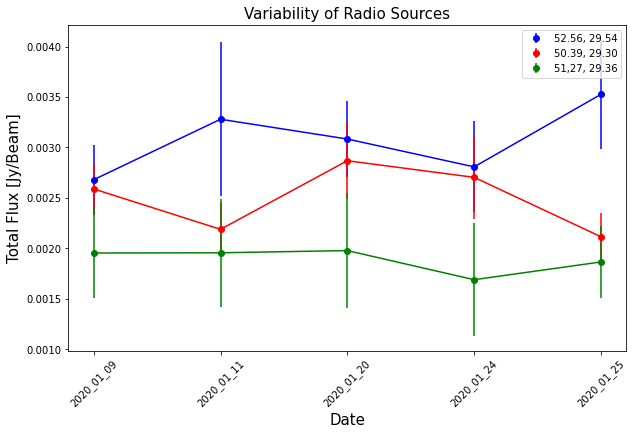

In [38]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })

plt.figure(figsize=(10, 6))

# Plot scatter points with error bars
plt.errorbar(x, total_flux_values, yerr=E_total_flux_values, fmt='o', c='b', label='52.56, 29.54')
plt.plot(total_flux_values, 'b')

plt.errorbar(x, total_flux_values_2, yerr=E_total_flux_values_2, fmt='o', c='red', label='50.39, 29.30')
plt.plot(total_flux_values_2, 'red')

plt.errorbar(x, total_flux_values_3, yerr=E_total_flux_values_3, fmt='o', c='g', label='51,27, 29.36')
plt.plot(total_flux_values_3, 'g')

plt.ylabel('Total Flux [Jy/Beam]', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Variability of Radio Sources', fontsize=15)

plt.xticks(rotation=45)
plt.legend()
plt.savefig('../server/figure/variability.png')
plt.show()

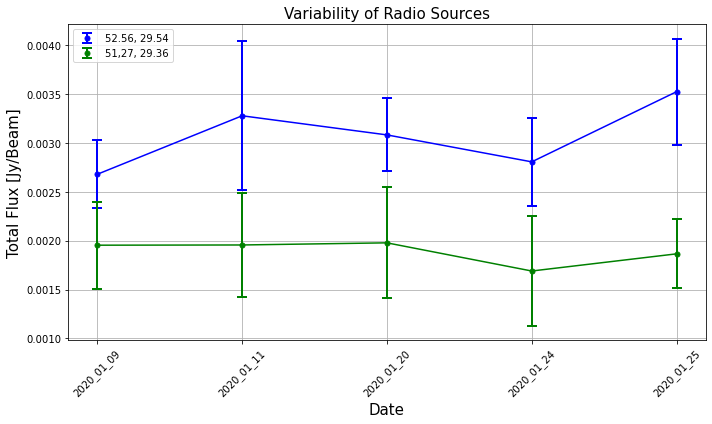

In [41]:
plt.figure(figsize=(10, 6))

# Define custom error bar parameters
error_kwargs = {'fmt': 'o', 'markersize': 5, 'capsize': 5, 'capthick': 2, 'elinewidth': 2}

# Plot scatter points with error bars
plt.errorbar(x, total_flux_values, yerr=E_total_flux_values, c='b', label='52.56, 29.54', **error_kwargs)
plt.plot(total_flux_values, 'b')

# plt.errorbar(x, total_flux_values_2, yerr=E_total_flux_values_2, c='red', label='50.39, 29.30', **error_kwargs)
# plt.plot(total_flux_values_2, 'red')

plt.errorbar(x, total_flux_values_3, yerr=E_total_flux_values_3, c='g', label='51,27, 29.36', **error_kwargs)
plt.plot(total_flux_values_3, 'g')

plt.ylabel('Total Flux [Jy/Beam]', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Variability of Radio Sources', fontsize=15)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping labels
plt.savefig('../server/figure/variability.jpeg')
plt.show()

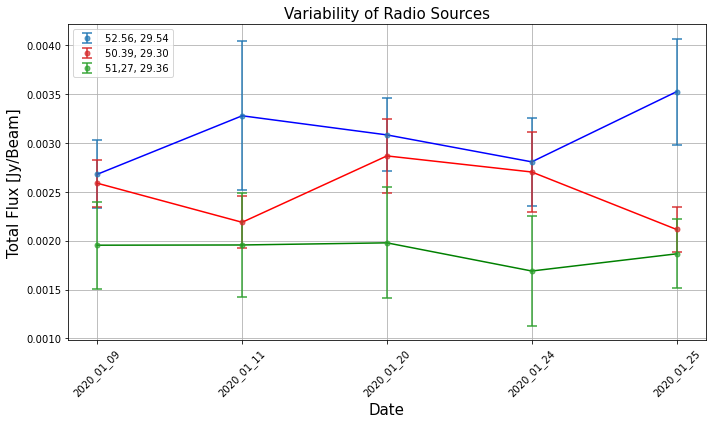

In [40]:
plt.figure(figsize=(10, 6))

# Define custom error bar parameters
error_kwargs = {'fmt': 'o', 'markersize': 5, 'capsize': 5, 'capthick': 2, 'elinewidth': 2, 'alpha': 0.7}

# Define lighter shades of the main plot colors for error bars
light_blue = 'tab:blue'
light_red = 'tab:red'
light_green = 'tab:green'

# Plot scatter points with error bars
plt.errorbar(x, total_flux_values, yerr=E_total_flux_values, c=light_blue, label='52.56, 29.54', **error_kwargs)
plt.plot(total_flux_values, 'b')

plt.errorbar(x, total_flux_values_2, yerr=E_total_flux_values_2, c=light_red, label='50.39, 29.30', **error_kwargs)
plt.plot(total_flux_values_2, 'red')

plt.errorbar(x, total_flux_values_3, yerr=E_total_flux_values_3, c=light_green, label='51,27, 29.36', **error_kwargs)
plt.plot(total_flux_values_3, 'g')

plt.ylabel('Total Flux [Jy/Beam]', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Variability of Radio Sources', fontsize=15)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping labels
plt.savefig('../server/figure/variability.png')
plt.show()